## B cell Clustering
## Modality : Flow Cytometry

In [1]:
import scyan as sy
import os
import glob
import anndata
import re
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
plt.rcParams['pdf.fonttype'] = 42
import numpy as np
import scanpy as sc
import scanpy.external as sce
import scipy.sparse
import seaborn as sns
import plotly as py
import plotly.graph_objects as go
import plotly.express as px
print(sy.__version__)
print(anndata.__version__)

/home/jupyter/libs/py_scrna/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Seed set to 0


1.6.2
0.10.8


In [ ]:
## reading the Bcell scFlow Object

In [2]:
PB1=sc.read("/home/jupyter/ALTRA_ANALYSIS/Certprod/input_files/cache/622a8aa4-30f9-45bd-81e0-d770f51b620a/adata_leiden_scaled_harmonized_umap_downsmpl_celltypes_total_b_cells_PB1.h5ad")

In [3]:
PB1

AnnData object with n_obs × n_vars = 4129003 × 24
    obs: 'Unnamed: 0', 'sample_id', 'cell_id', 'barcode', 'Time', 'SSC-W', 'SSC-H', 'SSC-A', 'FSC-W', 'FSC-H', 'FSC-A', 'SSC-B-W', 'SSC-B-H', 'SSC-B-A', 'Viability_logicle', 'labels', 'batch', 'panel', 'sample.sampleKitGuid', 'l1_labels', 'Status_Xsec', 'Status_Long', 'subject.biologicalSex', 'subject.subjectGuid', 'days_to_conversion', 'age_conv', 'bmi_conv', 'Age2023', 'leiden_res_2', 'leiden_res_2.5', 'leiden_res_3', 'leiden_res_1.0'
    var: 'antigens', 'gating_antigens', 'highly_variable'
    uns: 'neighbors', 'pca', 'scyan_scaling_means', 'scyan_scaling_stds'
    obsm: 'X_pca', 'X_pca_harmony', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [6]:
# Define the path for saving figures
fig_path = '/home/jupyter/ALTRA_ANALYSIS/Certprod/Figures/PB1/'
figsize = (4, 4)

# Set Scanpy figure parameters
sc.settings.figdir = fig_path
sc.settings.autosave = False
sc.set_figure_params(vector_friendly=True, dpi_save=300)

/home/jupyter/libs/py_scrna/lib/python3.12/site-packages/scyan/plot/_scanpy_plot/umap.py:884: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))


<Figure size 320x320 with 0 Axes>

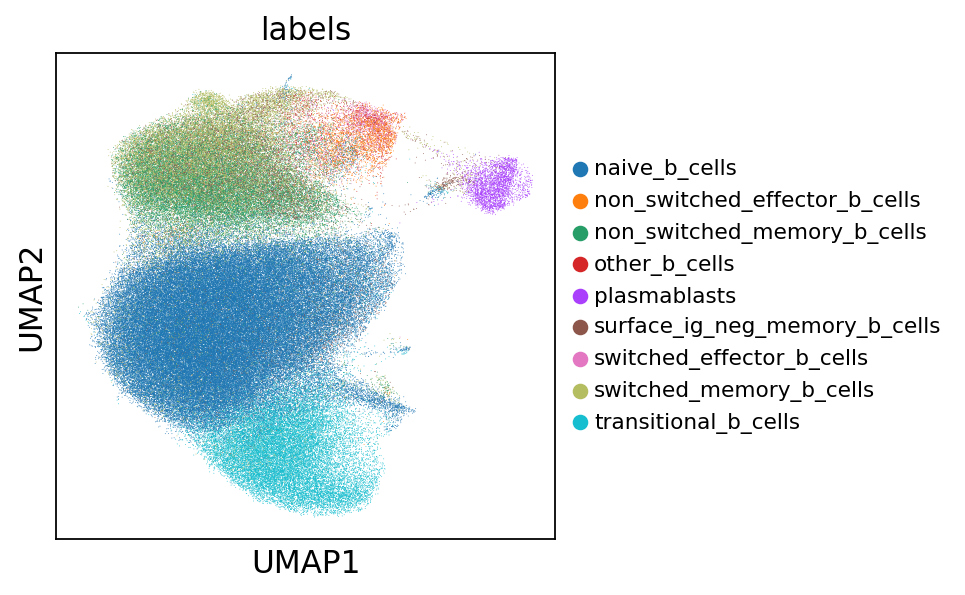

In [8]:
plt.figure(figsize=figsize)

p1=sy.plot.umap(PB1, color=["labels"], vmax='p95', vmin='p05', 
             show=False,## if set true pdf/png is empty
                #legend_loc='on data', 
                legend_fontsize='x-small')

plt.savefig(f"{fig_path}umap_S4H.pdf", dpi=300,bbox_inches='tight')
plt.show()

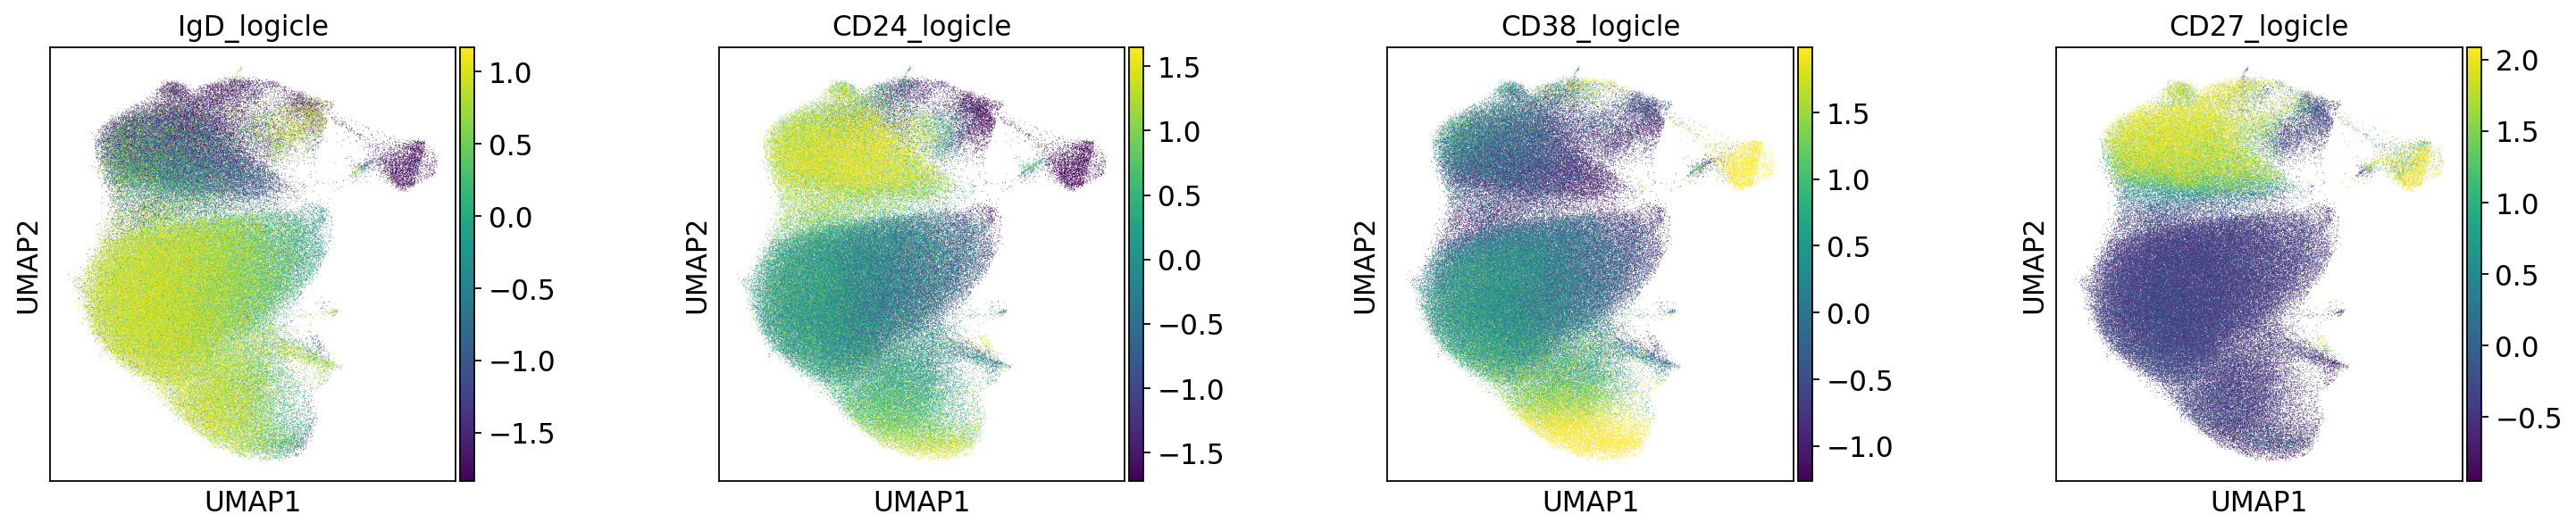

In [10]:
ncols = 4
nrows = 1
wspace = 0.5

fig, axs = plt.subplots(
    nrows=nrows,
    ncols=ncols,
    figsize=(ncols * figsize[0] + figsize[0] * wspace * (ncols - 1), nrows * figsize[1]),
)
plt.subplots_adjust(wspace=wspace)
colors = ["IgD_logicle", "CD24_logicle", "CD38_logicle", "CD27_logicle"]

for ax, color in zip(axs, colors):
    sy.plot.umap(PB1, color=color, show=False, ax=ax)

# Save the figure to the specified path
fig.savefig(f"{fig_path}umap_markers_PB1_S4H.pdf", dpi=300)


plt.show()

/home/jupyter/libs/py_scrna/lib/python3.12/site-packages/scyan/plot/_scanpy_plot/umap.py:884: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))


<Figure size 320x320 with 0 Axes>

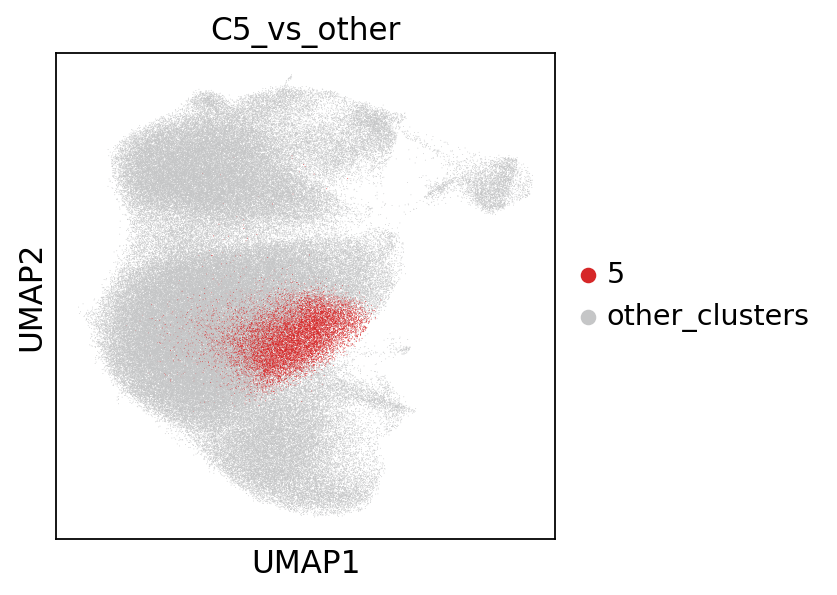

In [9]:
plt.figure(figsize=figsize)
palette = ['#d62728','#C5C6C7']

sy.plot.umap(PB1, color='C5_vs_other', palette=palette, show=False,
          )
plt.savefig(f"{fig_path}umap_PB1_C5_highlight_PB1_S4H.pdf", dpi=300,bbox_inches='tight')
plt.show()